In [11]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Years to Load

In [5]:
years = [13, 14, 15, 16]

In [6]:
taxi_df = {}

for i in years:
    taxi_df[i] = pd.read_csv("20" + str(i) \
                            + "lag.csv", sep = ",")
# "2016" and before
# taxi_df[15] = pd.concat([taxi_df[15], taxi_df[16]], axis = 0)\
#               .reset_index().drop(columns = ['index'])

taxi_df[15]

,Trip Start Timestamp,Pickup Community Area,Count,dayofyear,dayofyear_sin,dayofyear_cos,hour,hour_sin,hour_cos,weekday,lat,lon,temperature,wind_speed,humidity,lag1,lag2,lag3
0,2015/12/26 22,1,10,0.973,-0.086,0.996,0.91,-0.50,0.87,5,2.100,-0.300,-0.345,-0.03,1.104,7,4,5
1,2015/12/26 22,2,6,0.973,-0.086,0.996,0.91,-0.50,0.87,5,2.000,-0.100,-0.345,-0.03,1.104,8,9,8
2,2015/12/26 22,3,25,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.700,-0.400,-0.345,-0.03,1.104,23,37,31
3,2015/12/26 22,4,9,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.700,-0.100,-0.345,-0.03,1.104,9,6,15
4,2015/12/26 22,5,9,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.500,-0.200,-0.345,-0.03,1.104,5,8,11
5,2015/12/26 22,6,104,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.435,-0.458,-0.345,-0.03,1.104,94,97,87
6,2015/12/26 22,7,137,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.200,-0.500,-0.345,-0.03,1.104,92,130,111
7,2015/12/26 22,8,673,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.000,-0.700,-0.345,-0.03,1.104,676,795,885
8,2015/12/26 22,9,1,0.973,-0.086,0.996,0.91,-0.50,0.87,5,2.100,1.100,-0.345,-0.03,1.104,0,0,1
9,2015/12/26 22,10,2,0.973,-0.086,0.996,0.91,-0.50,0.87,5,1.800,1.000,-0.345,-0.03,1.104,0,1,1


In [7]:
y_df = {}
X_raw_df = {}
for i in years:
    y_df[i] =  pd.DataFrame(taxi_df[i]['Count'])
    X_raw_df[i] = taxi_df[i].drop(columns = ['Pickup Community Area', \
                                             'Count', 'Trip Start Timestamp'])
X_raw_df[16]

,dayofyear,dayofyear_sin,dayofyear_cos,hour,hour_sin,hour_cos,weekday,lat,lon,temperature,wind_speed,humidity,lag1,lag2,lag3
0,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,2.100,-0.300,0.550,0.42,1.506,7,11,3
1,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,2.000,-0.100,0.550,0.42,1.506,14,6,3
2,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.700,-0.400,0.550,0.42,1.506,24,19,6
3,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.700,-0.100,0.550,0.42,1.506,5,3,2
4,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.500,-0.200,0.550,0.42,1.506,9,7,9
5,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.435,-0.458,0.550,0.42,1.506,64,35,25
6,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.200,-0.500,0.550,0.42,1.506,58,30,15
7,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.000,-0.700,0.550,0.42,1.506,355,159,72
8,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,2.100,1.100,0.550,0.42,1.506,0,0,0
9,0.562,-0.984,0.179,-0.30,0.87,-0.50,1,1.800,1.000,0.550,0.42,1.506,3,0,1


In [8]:
years = [13, 14, 15, 16]

weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])

encoded_df = {}
for i in years:
    enc.fit(X_raw_df[i].weekday.values.reshape(-1, 1))
    encoded_df[i] = pd.DataFrame(enc.transform(X_raw_df[i].weekday.values.reshape(-1, 1))\
                                 .toarray().astype(int))\
                                .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

In [9]:
X_encode_df = {}
for i in years:
    X_encode_df[i] = pd.concat([X_raw_df[i].drop(columns=['weekday']), encoded_df[i]], axis=1) 

In [10]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values
X_mat[15].shape

(672210, 21)

In [16]:
k = [5, 10, 15, 20, 25, 30]
cvmse = []
testmse = []
invdcvmse = []
invdtestmse = []
for i in range(6):
    neigh = KNeighborsRegressor(n_neighbors=k[i], n_jobs = -1)
    neigh.fit(X_mat[13], y_mat[13])
    e1 = mean_squared_error(y_true = y_mat[14], y_pred = neigh.predict(X_mat[14]))
    neigh.fit(X_mat[14], y_mat[14])
    e2 = mean_squared_error(y_true = y_mat[15], y_pred = neigh.predict(X_mat[15]))
    cvmse.append((e1+e2)/2.0)
    neigh.fit(X_mat[15], y_mat[15])
    testmse.append(mean_squared_error(y_true = y_mat[16], y_pred = neigh.predict(X_mat[16])))
    neigh = KNeighborsRegressor(n_neighbors=k[i], weights = 'distance', n_jobs = -1)
    neigh.fit(X_mat[13], y_mat[13])
    e1 = mean_squared_error(y_true = y_mat[14], y_pred = neigh.predict(X_mat[14]))
    neigh.fit(X_mat[14], y_mat[14])
    e2 = mean_squared_error(y_true = y_mat[15], y_pred = neigh.predict(X_mat[15]))
    invdcvmse.append((e1+e2)/2.0)
    neigh.fit(X_mat[15], y_mat[15])
    invdtestmse.append(mean_squared_error(y_true = y_mat[16], y_pred = neigh.predict(X_mat[16])))    

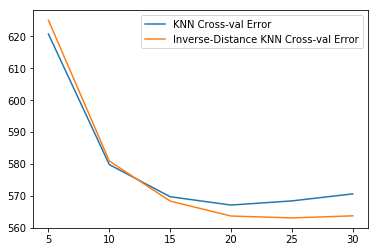

In [28]:
plt.plot(k, cvmse)
plt.plot(k, invdcvmse)
plt.legend(['KNN Cross-val Error', 'Inverse-Distance KNN Cross-val Error'])

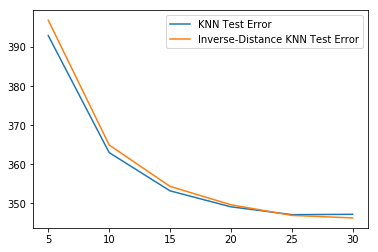

In [30]:
plt.plot(k, testmse)
plt.plot(k, invdtestmse)
plt.legend(['KNN Test Error', 'Inverse-Distance KNN Test Error'])

In [31]:
cvmse

[620.7111682089335,
 579.8450700701629,
 569.7858858572713,
 567.1859085292905,
 568.4835402594388,
 570.6798309946253]

In [32]:
testmse

[392.9266353605382,
 363.0070624465532,
 353.21543449993203,
 349.13072590345416,
 347.12496440629326,
 347.20691628388823]

In [33]:
invdcvmse

[625.0085853707321,
 580.9704586770964,
 568.421126403054,
 563.7518013674628,
 563.159793556629,
 563.8061898130638]

In [34]:
invdtestmse

[396.8779717885973,
 364.956763425402,
 354.35341051201226,
 349.6574392018514,
 346.933080567068,
 346.2879930307121]